# PFA Assignment 
# Total Marks: 5

# Q1: Outlier Detection

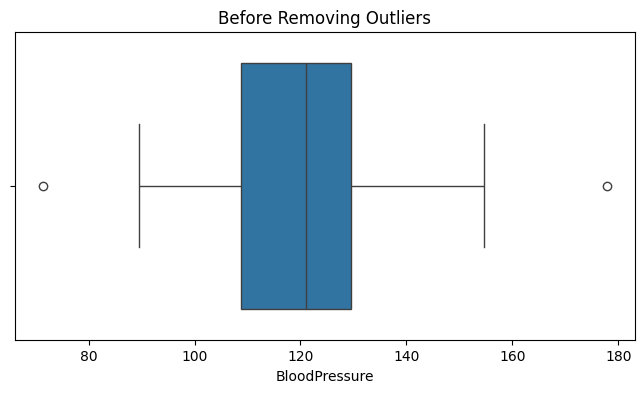

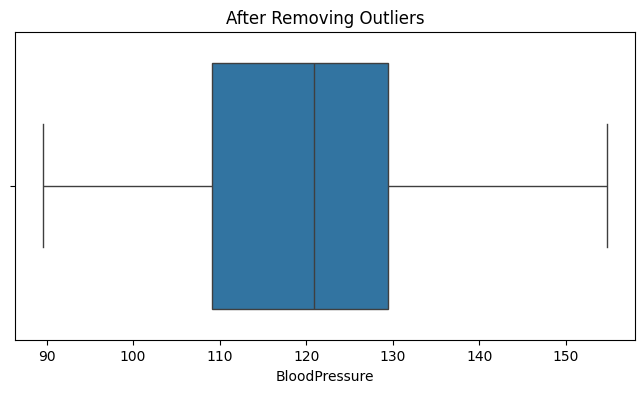

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('patient_data.csv') 

# Boxplot before removing outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['BloodPressure'])
plt.title('Before Removing Outliers')
plt.show()

# Removing outliers using IQR
quantile1 = df['BloodPressure'].quantile(0.25)
quantile3 = df['BloodPressure'].quantile(0.75)

#Iqr value
IQR_value = quantile3 - quantile1

#lowerbound & upper bound value
lower_bound_value = quantile1 - 1.5 * IQR_value
upper_bound_value = quantile3 + 1.5 * IQR_value

#removing outliers from the bloodpressure col
df_clean = df[(df['BloodPressure'] >= lower_bound_value) & (df['BloodPressure'] <= upper_bound_value)]

# Boxplot after removing outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['BloodPressure'])
plt.title('After Removing Outliers')
plt.show()

# Q2: Hypothesis Testing

Hypothesis:
Null hypothesis (H0): The mean cholesterol level = 195

Alternative hypothesis (H1): The mean cholesterol level ≠ 195

#### We will perform a one-sample t-test because we are comparing the mean of a single sample to a known population mean (195)

In [ ]:
sample_size = 20
chol_sample = df['CholesterolLevel'].sample(sample_size, random_state=1)

ttest, p_value = stats.ttest_1samp(chol_sample, 195)
print("T-statistic:", ttest)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: The mean is significantly different from 195")
else:
    print("Fail to reject the null hypothesis: No significant difference from 195")

T-statistic: 2.0416447301590352
P-value: 0.05532097399095901
Fail to reject the null hypothesis: No significant difference from 195



Null Hypothesis (H0): Gender and RiskCategory are not related

Alternative Hypothesis (H1): Gender and RiskCategory are related

#### We will do  Chi-Square Test of Independence cuz we’re checking if two categorical variables are related. 

In [ ]:
df_table = pd.crosstab(df['Gender'], df['RiskCategory'])
chi2, p_value, degree_of_freedom, expected_values = stats.chi2_contingency(df_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: There is a significant relationship between Gender and RiskCategory.")
else:
    print("Fail to reject H₀: There is No significant relationship between Gender and RiskCategory.")

Chi-square Statistic: 1.2769946980473286
P-value: 0.5280853561197303
Fail to reject H₀: There is No significant relationship between Gender and RiskCategory.


# Q3: Modeling with First Order ODE

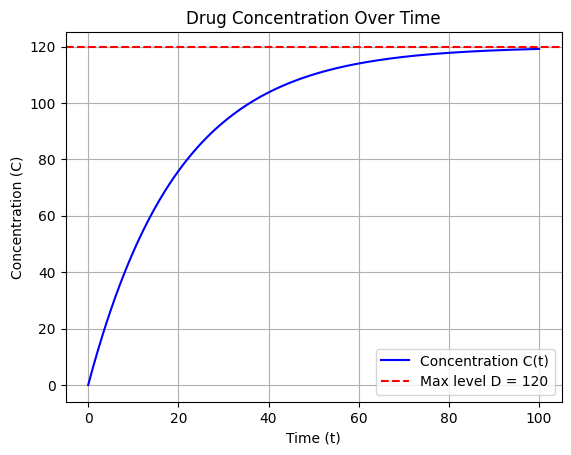

In [ ]:
from scipy.integrate import odeint

# given
k = 0.05
D = 120

# Define the ODE
def dCdt(t, C):
    return k * (D - C)

# Initial concentration
C0 = 0

# Time range
t = np.linspace(0, 100, 200)

# Solve using odeint
sol_odeint = odeint(dCdt, y0=C0, t=t, tfirst=True)

# Plot the result
plt.plot(t, sol_odeint, label='Concentration C(t)', color='blue')
plt.axhline(D, color='red', linestyle='--', label='Max level D = 120')
plt.xlabel('Time (t)')
plt.ylabel('Concentration (C)')
plt.title('Drug Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Physical meaning of the concentration curve: 
The graph shows how the drug concentration in the patient's blood changes over time.

At the beginning, the concentration is zero because the drug has just been given and it hasn't entered the bloodstream yet. Then, the concentration starts to increase quickly, because the difference between the current level and the maximum level is big, so the body absorbs the drug faster.

As time passes, the concentration continues to rise but more slowly, because the level in the blood is getting closer to the maximum possible level (which is 120 mg/dL). After some time, the graph becomes almost flat, which means the concentration is no longer changing much, it has reached a stable level.